In [1]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
pd.options.mode.chained_assignment = None

In [2]:
%matplotlib inline

In [6]:
train = pd.read_csv('C:\\Users\\Themlinwang\\python\\Bike sharing data\\train.csv')
test = pd.read_csv('C:\\Users\\Themlinwang\\python\\Bike sharing data\\test.csv')
submit= pd.read_csv('C:\\Users\\Themlinwang\\python\\Bike sharing data\\sampleSubmission.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [8]:
test.keys()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [9]:
train.describe()
#在count中：50百分位數為145，75百分位數為284，但Max卻高達977，有outlier的可能產生，若先刪除極端值，分析的結果會較為準確。

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [11]:
print ('shape of the before outlier：',train.shape)

shape of the before outlier： (10886, 12)


In [12]:
train = train[np.abs(train['count']-train['count'].mean())<(3*train['count'].std())]

In [13]:
print ('shape of the before outlier：',train.shape)

shape of the before outlier： (10739, 12)


In [14]:
data = train.append(test,sort=True)

In [15]:
data.reset_index(inplace=True)

In [16]:
data.drop('index',inplace=True,axis=1)

In [17]:
data.head(5)

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [18]:
data['datetime'][0]

'2011-01-01 00:00:00'

In [19]:
data['date']=data['datetime'].apply(lambda x : x.split()[0])
data['hour']=data['datetime'].apply(lambda x : x.split()[1].split(':')[0]).astype(int)
data['year']=data['datetime'].apply(lambda x : x.split('-')[0])
data["weekday"] = data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [20]:
data['date'].head(5)

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: date, dtype: object

In [21]:
data['hour'].head(5)

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int32

In [22]:
data["weekday"].head(5)

0    5
1    5
2    5
3    5
4    5
Name: weekday, dtype: int64

In [23]:
data["month"].head(5)

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [24]:
data.head(2)

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,hour,year,weekday,month
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,2011-01-01,0,2011,5,1
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,2011-01-01,1,2011,5,1


[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'distribution of windspeed')]

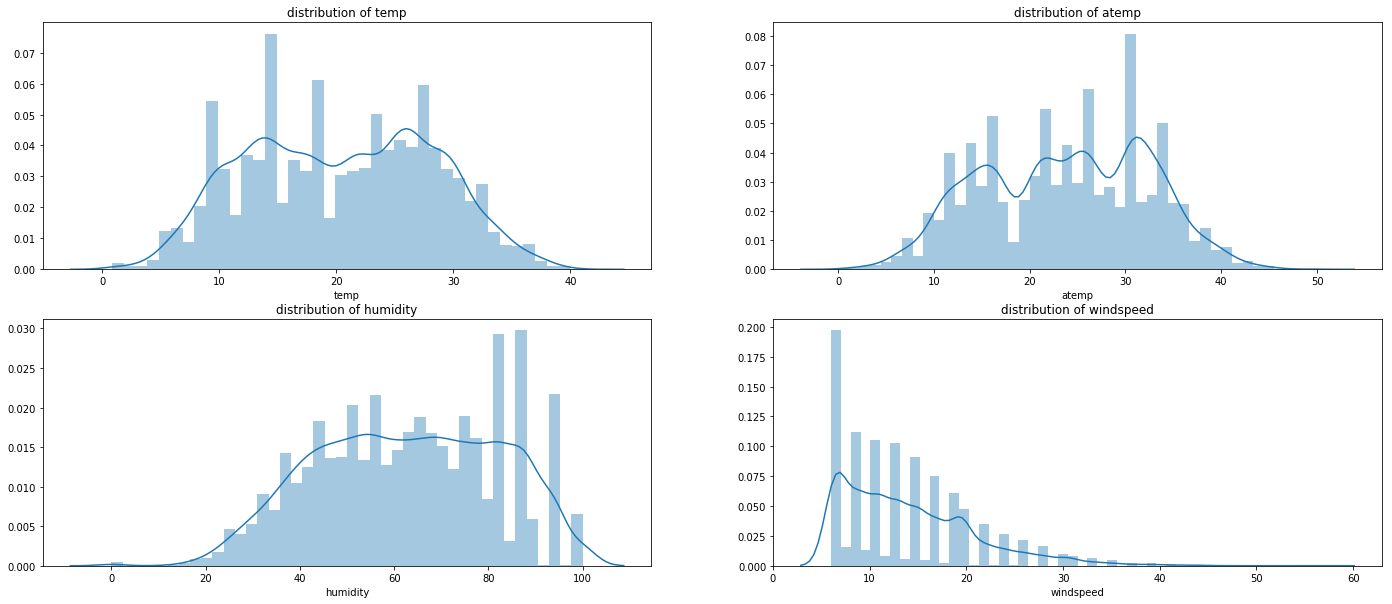

In [28]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(24,10)
sns.distplot(data['temp'],ax=axes[0][0])
sns.distplot(data['atemp'],ax=axes[0][1])
sns.distplot(data['humidity'],ax=axes[1][0])
sns.distplot(data['windspeed'],ax=axes[1][1])

axes[0][0].set(xlabel='temp',title='distribution of temp')
axes[0][1].set(xlabel='atemp',title='distribution of atemp')
axes[1][0].set(xlabel='humidity',title='distribution of humidity')
axes[1][1].set(xlabel='windspeed',title='distribution of windspeed')

#Windspeed圖中可發現明明是連續資訊，但圖中卻有很多空格，屬性可能被簡單的補值了

In [32]:
dataWind0=data[data['windspeed']==0]
dataWindNot0=data[data['windspeed']!=0]
rfModel_wind=RandomForestRegressor(n_estimators=1000,random_state=42)
windColumns=['season','weather','humidity','month','temp','year','atemp']
rfModel_wind.fit(dataWindNot0[windColumns],dataWindNot0['windspeed'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [39]:
dataWindNot0

,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,hour,year,weekday,month
0,5,12.880,0.0,1.0,2011-01-01 05:00:00,0,75,1.0,1,9.84,2,6.003200,0,2011-01-01,5,2011,5,1
1,10,19.695,12.0,36.0,2011-01-01 10:00:00,0,76,24.0,1,15.58,1,16.997900,0,2011-01-01,10,2011,5,1
2,11,16.665,26.0,56.0,2011-01-01 11:00:00,0,81,30.0,1,14.76,1,19.001200,0,2011-01-01,11,2011,5,1
3,12,21.210,29.0,84.0,2011-01-01 12:00:00,0,77,55.0,1,17.22,1,19.001200,0,2011-01-01,12,2011,5,1
4,13,22.725,47.0,94.0,2011-01-01 13:00:00,0,72,47.0,1,18.86,2,19.999500,0,2011-01-01,13,2011,5,1
5,14,22.725,35.0,106.0,2011-01-01 14:00:00,0,72,71.0,1,18.86,2,19.001200,0,2011-01-01,14,2011,5,1
6,15,21.970,40.0,110.0,2011-01-01 15:00:00,0,77,70.0,1,18.04,2,19.999500,0,2011-01-01,15,2011,5,1
7,16,21.210,41.0,93.0,2011-01-01 16:00:00,0,82,52.0,1,17.22,2,19.999500,0,2011-01-01,16,2011,5,1
8,17,21.970,15.0,67.0,2011-01-01 17:00:00,0,82,52.0,1,18.04,2,19.001200,0,2011-01-01,17,2011,5,1
9,18,21.210,9.0,35.0,2011-01-01 18:00:00,0,88,26.0,1,17.22,3,16.997900,0,2011-01-01,18,2011,5,1


In [40]:
data.drop('index',inplace=True,axis=1)

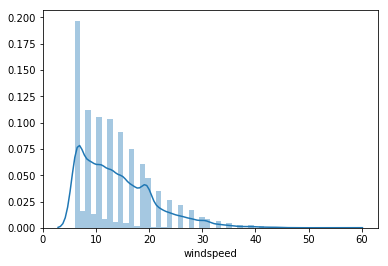

In [41]:
sns.distplot(data['windspeed'])

In [42]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by='datetime')

In [43]:
dataTest = data[~pd.notnull(data['count'])].sort_values(by='datetime')

In [44]:
datetimecol = dataTest['datetime']
yLabels=dataTrain['count']
yLabelsLog=np.log(yLabels)

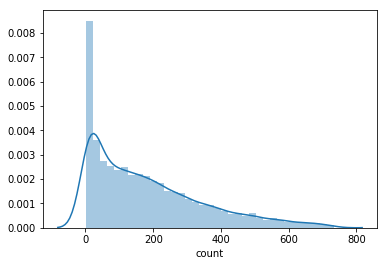

In [45]:
sns.distplot(yLabels) #資料分佈過於左偏，可以用一些方式讓資料趨近於常態分佈

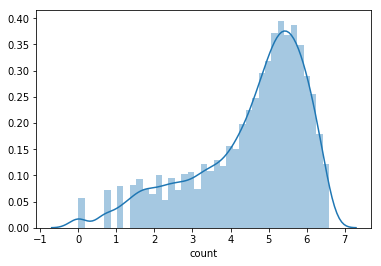

In [46]:
sns.distplot(yLabelsLog) #取log是其中一種

In [47]:
dropFeature=['casual','count','datetime','date','registered']
dataTrain=dataTrain.drop(dropFeature,axis=1)
dataTest=dataTest.drop(dropFeature,axis=1)

In [48]:
rfModel = RandomForestRegressor(n_estimators=2000,random_state=42) #設定隨機森林參數
yLabelsLog = np.log(yLabels)                                       
rfModel.fit(dataTrain,yLabelsLog)  #將Count欄位取log後放進dataTrain中Train Model


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [49]:
prep=rfModel.predict(X=dataTrain)

In [50]:
prep1=rfModel.predict(X=dataTest)

In [51]:
prep1

array([2.37561254, 1.58490446, 1.05982167, ..., 4.92921252, 4.69381152,
       4.05861499])

In [52]:
aa=[max(0,x) for x in np.exp(prep1)]
aa

[10.757600583424004,
 4.878825236657277,
 2.8858563214768824,
 3.036263543808291,
 2.5614244815253437,
 5.295186637904612,
 34.94510598637826,
 91.18628517365521,
 204.9919459754633,
 122.37133796347257,
 58.58261858449109,
 59.27518485921662,
 78.13536835698407,
 71.10435634183057,
 72.44214773146089,
 78.67631349253705,
 85.86709023314583,
 191.40489910249477,
 174.7464099043165,
 100.65818633836766,
 70.75775040006579,
 47.97837398500831,
 42.633169850899606,
 21.526071413389165,
 13.317477810430587,
 5.589930052367157,
 3.4938822682662956,
 1.957083727689075,
 2.076762498613037,
 2.5245390473401805,
 32.404583601034616,
 88.73908085448606,
 192.93854992192303,
 125.26113598497585,
 48.65363453876286,
 61.35799330547179,
 68.61114934201487,
 63.55445799698179,
 59.30543079677787,
 56.031638337287625,
 82.72978252460376,
 141.40638976439888,
 139.27458960665695,
 96.11131647260761,
 58.37203606527869,
 40.42618087441999,
 32.177315376489815,
 18.8733071615633,
 20.419342872794793,
 1

In [53]:
submission = pd.DataFrame({
    'datetime':datetimecol,
    'count':[max(0,x) for x in np.exp(prep1)]
})
submission.to_csv('bike_predictions_RF.csv',index=False)

In [54]:
submission

,datetime,count
9442,2011-01-20 00:00:00,10.757601
16365,2011-01-20 01:00:00,4.878825
16366,2011-01-20 02:00:00,2.885856
9443,2011-01-20 03:00:00,3.036264
9444,2011-01-20 04:00:00,2.561424
9445,2011-01-20 05:00:00,5.295187
9446,2011-01-20 06:00:00,34.945106
9447,2011-01-20 07:00:00,91.186285
9448,2011-01-20 08:00:00,204.991946
9449,2011-01-20 09:00:00,122.371338
